# Time Series Week 4 - Assignment

## 1. Modeling Seasonal Variations

### 1.1. Visualization for Item Sales Data
**Task:** Visualize the item sales data to identify trends and seasonal variations


In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# Load the sales dataset and understand its characteristics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
'''
print("\n")

!ls /content/drive/Shared\ drives/ #드라이브 안에 어떤 파일이 있는지
print("\n")

!ls /content/drive/Shared\ drives/timeseries-datasets/ #파일안에 csv3개, 엑셀 하나 있다는것 알 수 있음.
print("\n")
'''
df= pd.read_csv('/content/drive/Shared drives/timeseries-datasets/Energy_Consumption_Data_2010_2020.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Dates            4018 non-null   object
 1   Energy_Consumed  4018 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.9+ KB


In [114]:
# Ensure the Dates are in datetime format and use the column as an index in your dateset
df['Dates'] = pd.to_datetime(df['Dates'])

df = df.set_index('Dates')

In [115]:
# Define the target variable (y)
y = df['Energy_Consumed']

# Split the dataset to training and test set (leave 2 years for testing)
y_to_train = y.iloc[:len(y)-731]
y_to_test = y.iloc[len(y)-731:]

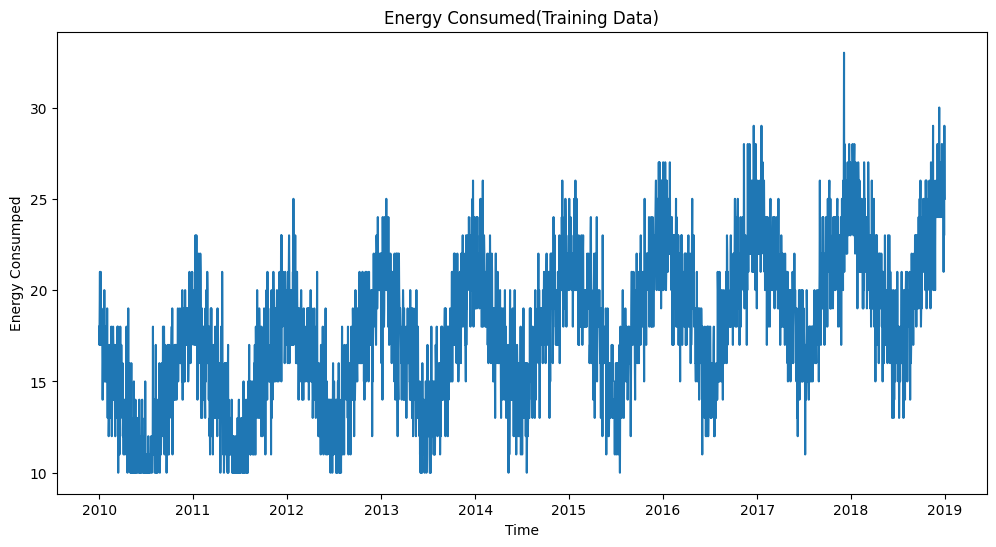

'\ny_to_train 자체는 인덱스와 값 모두를 포함하지만, .values를 사용하면 인덱스(날짜)는 제외하고 값만 추출함. 값만 배열로 변환.\n'

In [116]:
# Plot the training data and analyze the visual trends and seasonality
plt.figure(figsize = (12,6))
plt.plot(df.index[:len(y_to_train)], y_to_train.values, label='Energy Consumped')
plt.title('Energy Consumed(Training Data)')
plt.xlabel('Time')
plt.ylabel('Energy Consumped')
plt.legend
plt.show()

'''
y_to_train 자체는 인덱스와 값 모두를 포함하지만, .values를 사용하면 인덱스(날짜)는 제외하고 값만 추출함. 값만 배열로 변환.
'''

### 1.2. Trend Linear Modeling
**Task:** Fit a linear model to the sales data to capture the overall trend

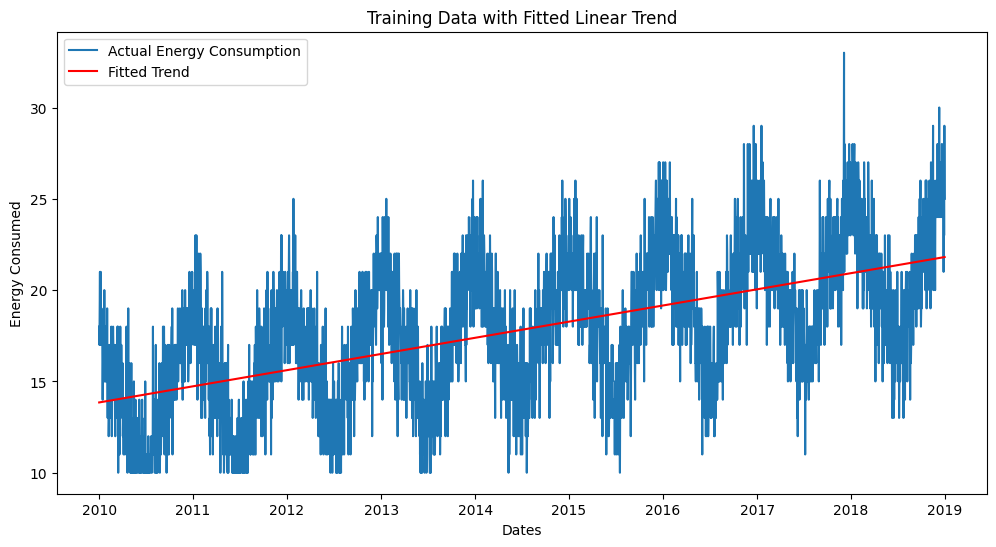

In [117]:
# Define the feature (X) and target (y) variables that you will use to plot the trend line
X_train_trend = np.arange(len(y_to_train)).reshape(-1, 1)
y_train_trend = y_to_train.values

# Fit and predict the model on the features
trend_model = LinearRegression() #선형회귀 모델 생성
trend_model.fit(X_train_trend, y_train_trend)
TRt_train = trend_model.predict(X_train_trend)
# Plot the actual sales data and the fitted linear trend
plt.figure(figsize=(12, 6))
plt.plot(y_to_train.index, y_to_train.values, label='Actual Energy Consumption')
plt.plot(y_to_train.index, TRt_train, label='Fitted Trend', color='red') #df[:len(y_train_trend)]라고 해도 됨.
plt.title('Training Data with Fitted Linear Trend')
plt.xlabel('Dates')
plt.ylabel('Energy Consumed')
plt.legend()
plt.show()

### 1.3. Seasonality Modeling - Binary Variable Models
**Task:** Model seasonality using binary (dummy) variables

In [118]:
# Create a separate dataset for binary seasonality modeling
df_train_bi = y_to_train.to_frame()
# Define the time index (t), constant and extract month variable from the data
df_train_bi['t'] = np.arange(1, len(df_train_bi)+1)
df_train_bi['constant'] = 1
# Create month dummy variables
df_train_bi['month'] = df_train_bi.index.month
df_train_bi = pd.get_dummies(df_train_bi, columns = ['month'], drop_first = False)

month_columns = [col for col in df_train_bi.columns if col.startswith('month_')]
for col in month_columns:
    month = int(col.split('_')[1])
    df_train_bi[col] = (df_train_bi.index.month == month).astype(int)

# Remove the January column
df_train_bi.drop(columns = ['month_1'], inplace = True)
# Display the information of the columns
df_train_bi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2010-01-01 to 2018-12-31
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Energy_Consumed  3287 non-null   int64
 1   t                3287 non-null   int64
 2   constant         3287 non-null   int64
 3   month_2          3287 non-null   int64
 4   month_3          3287 non-null   int64
 5   month_4          3287 non-null   int64
 6   month_5          3287 non-null   int64
 7   month_6          3287 non-null   int64
 8   month_7          3287 non-null   int64
 9   month_8          3287 non-null   int64
 10  month_9          3287 non-null   int64
 11  month_10         3287 non-null   int64
 12  month_11         3287 non-null   int64
 13  month_12         3287 non-null   int64
dtypes: int64(14)
memory usage: 385.2 KB


In [119]:
# Split the data into features(X) and target variable (y)
X_train_seasonal_binary = df_train_bi.drop(columns = ['Energy_Consumed'])
Y_train_seasonal_binary = df_train_bi['Energy_Consumed']


In [120]:
# Fit a linear regression model that includes both the trend (time) and binary variables to model seasonality
seasonal_model_binary = LinearRegression()
seasonal_model_binary.fit(X_train_seasonal_binary, Y_train_seasonal_binary)
SNt_train_binary = seasonal_model_binary.predict(X_train_seasonal_binary)
# Output regression coefficients
coefficients = seasonal_model_binary.coef_
intercept = seasonal_model_binary.intercept_

print("Intercept:", intercept)
print("Coefficients:")
for col, coef in zip(X_train_seasonal_binary.columns, coefficients):
    print(f"{col}: {coef}")

Intercept: 17.689607339894756
Coefficients:
t: 0.0024210525665919933
constant: -6.314393452555578e-16
month_2: -1.9786553149301631
month_3: -3.0501901489526917
month_4: -4.182455191301836
month_5: -5.92905715121373
month_6: -7.704213471938048
month_7: -7.965630246664725
month_8: -6.0908620876986115
month_9: -4.119542900657085
month_10: -2.908797190318065
month_11: -2.0598196998117873
month_12: -0.017054873582684177


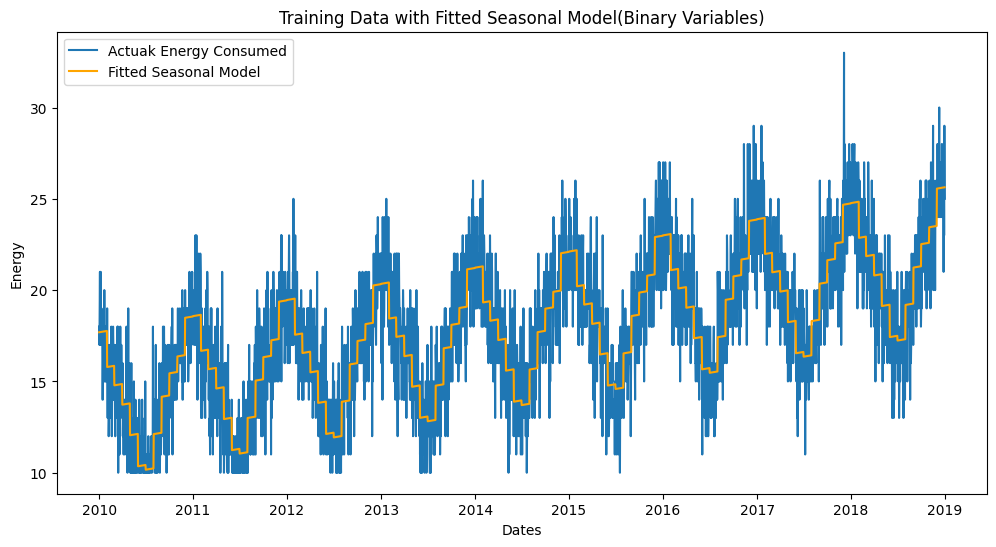

In [121]:
# Plot the results and compare with the raw data
plt.figure(figsize=(12, 6))
plt.plot(y_to_train.index, y_to_train.values, label='Actuak Energy Consumed') #y_to_train.index 가 맞나? df는 아닌거 맞음.
plt.plot(y_to_train.index, SNt_train_binary, label='Fitted Seasonal Model', color='orange')
plt.title('Training Data with Fitted Seasonal Model(Binary Variables)')
plt.xlabel('Dates')
plt.ylabel('Energy')
plt.legend()
plt.show()

### 1.4. Seasonality Modeling - Trigonometric Models
**Task:** Model seasonality using trigonometric functions (sine and cosine)

In [122]:
# Create a separate dataset for trigonometric seasonality modeling
df_train_tri = y_to_train.to_frame()

# Define the time index (t) and constant
df_train_tri['t'] = np.arange(1, len(df_train_tri) + 1)
df_train_tri['constant']=1

# Define the period of seasonality (L)
L = 30
df_train_tri['(sin2pi)/L'] = np.sin(2 * np.pi * df_train_tri['t'] / L)
df_train_tri['(cos2pi)/L'] = np.cos(2 * np.pi * df_train_tri['t'] / L)
df_train_tri['(sin4pi)/L'] = np.sin(4 * np.pi * df_train_tri['t'] / L)
df_train_tri['(cos4pi)/L'] = np.cos(4 * np.pi * df_train_tri['t'] / L)


In [123]:
# Split the data into features(X) and target variable (y)
X_train_seasonal_tri = df_train_tri.drop(columns=['Energy_Consumed'])
y_train_seasonal_tri = df_train_tri['Energy_Consumed']


In [124]:
# Fit a linear regression model that includes both the trend (time) and binary variables to model seasonality
seasonal_model_tri = LinearRegression()
seasonal_model_tri.fit(X_train_seasonal_tri, y_train_seasonal_tri)
STT_train_binary = seasonal_model_tri.predict(X_train_seasonal_tri)
# Output regression coefficients
tri_coefficients = seasonal_model_tri.coef_
tri_intercept = seasonal_model_tri.intercept_

print("Intercept:", tri_intercept)
print("Coefficients:")
for col, coef in zip(X_train_seasonal_tri.columns, tri_coefficients):
    print(f"{col}: {coef}")


Intercept: 13.84638847722796
Coefficients:
t: 0.0024226917608837213
constant: -5.637851296924623e-16
(sin2pi)/L: 0.02700214389825959
(cos2pi)/L: 0.0417475498088261
(sin4pi)/L: -0.032305179820605115
(cos4pi)/L: 0.018360883740530253


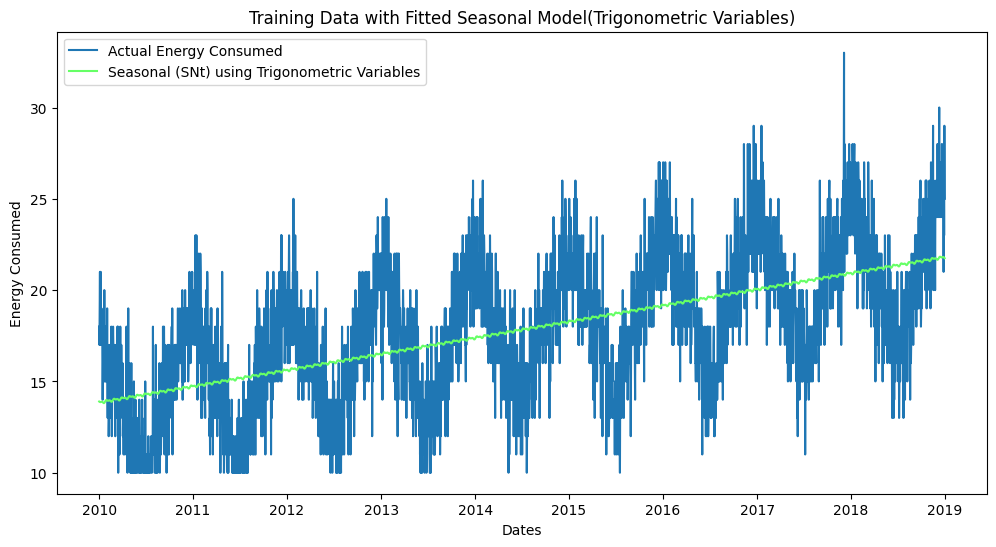

In [125]:
# Plot the results and compare with the raw data
plt.figure(figsize=(12, 6))
plt.plot(y_to_train.index, y_to_train.values, label='Actual Energy Consumed')
plt.plot(y_to_train.index, STT_train_binary, label='Seasonal (SNt) using Trigonometric Variables', color=(0.4, 1.0, 0.4))
plt.title('Training Data with Fitted Seasonal Model(Trigonometric Variables)')
plt.xlabel('Dates')
plt.ylabel('Energy Consumed')
plt.legend()
plt.show()

### 1.5. Durbin-Watson Test for Autocorrelation Check for Residuals
**Task:** Check for autocorrelation in the residuals using the Durbin-Watson test

In [126]:
# Calculate the residuals of the actual values vs the two seasonal components (Binary and Trigonometric)
seasonal_binary_residual = np.ravel((y_to_train.values - SNt_train_binary))
seasonal_tri_residual = np.ravel((y_to_train.values - STT_train_binary))

# Calculate Durbin-Watson test statistic
dw_binary_test = durbin_watson(seasonal_binary_residual)
dw_tri_test = durbin_watson(seasonal_tri_residual)
print(f'Durbin-Watson Test Statistic (Binary Variables): {dw_binary_test}')
print(f'Durbin-Watson Test Statistic (Trigonometric): {dw_tri_test}')



Durbin-Watson Test Statistic (Binary Variables): 2.0303756664508126
Durbin-Watson Test Statistic (Trigonometric): 0.7525564454328608


### 1.6 Evaluation on Test Dataset
**Task:** Repeat the above tasks on test dataset and evaluate the models created for the seasonality components using MSE

In [127]:
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf


# Create a separate dataset for binary seasonality modeling
df_test_bi = y_to_test.to_frame()

# Define the time index (t), constant and extract month variable from the data
df_test_bi['t'] = np.arange(3288, len(df_test_bi) + 3288)
df_test_bi['constant']=1
df_test_bi['month'] = df_test_bi.index.month
# Create month dummy variables
df_test_bi = pd.get_dummies(df_test_bi, columns=['month'], drop_first=False)

# Remove the January column
df_test_bi.drop(columns=['month_1'], inplace=True)
# Display the information of the columns
df_test_bi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Energy_Consumed  731 non-null    int64
 1   t                731 non-null    int64
 2   constant         731 non-null    int64
 3   month_2          731 non-null    bool 
 4   month_3          731 non-null    bool 
 5   month_4          731 non-null    bool 
 6   month_5          731 non-null    bool 
 7   month_6          731 non-null    bool 
 8   month_7          731 non-null    bool 
 9   month_8          731 non-null    bool 
 10  month_9          731 non-null    bool 
 11  month_10         731 non-null    bool 
 12  month_11         731 non-null    bool 
 13  month_12         731 non-null    bool 
dtypes: bool(11), int64(3)
memory usage: 30.7 KB


In [128]:
# Split the data into features(X) and target variable (y)
X_test_seasonal_binary = df_test_bi.drop(columns=['Energy_Consumed'])
y_test_seasonal_binary = df_test_bi['Energy_Consumed']


In [129]:
# Create a separate dataset for trigonometric seasonality modeling
df_test_tri = y_to_test.to_frame()
# Define the time index (t), constant and extract month variable from the data
df_test_tri['t'] = np.arange(3288, len(df_test_tri) + 3288)
df_test_tri['constant']=1

# Define the period of seasonality (L)
L = 30
df_test_tri['(sin2pi)/L'] = np.sin(2 * np.pi * df_test_tri['t'] / L)
df_test_tri['(cos2pi)/L'] = np.cos(2 * np.pi * df_test_tri['t'] / L)
df_test_tri['(sin4pi)/L'] = np.sin(4 * np.pi * df_test_tri['t'] / L)
df_test_tri['(cos4pi)/L'] = np.cos(4 * np.pi * df_test_tri['t'] / L)


In [130]:
# Split the data into features(X) and target variable (y)
X_test_seasonal_tri = df_test_tri.drop(columns=['Energy_Consumed'])
y_test_seasonal_tri = df_test_tri['Energy_Consumed']

In [131]:
# Evaluate the two models using Mean Squared Error (MSE) on the test dataset
seasonal_binary_test = seasonal_model_binary.predict(X_test_seasonal_binary)
seasonal_tri_test = seasonal_model_tri.predict(X_test_seasonal_tri)
mse_binary = mean_squared_error(y_test_seasonal_binary, seasonal_binary_test)
mse_trig = mean_squared_error(y_test_seasonal_tri, seasonal_tri_test)

print(f'Mean Squared Error (Binary Variables): {mse_binary}')
print(f'Mean Squared Error (Trigonometric): {mse_trig}')


Mean Squared Error (Binary Variables): 4.349847695585256
Mean Squared Error (Trigonometric): 11.885617010920342


## 2. Modeling Growth Curve Models

### 2.1. Prepare the Data
**Task:** Prepare the data for growth curve modeling

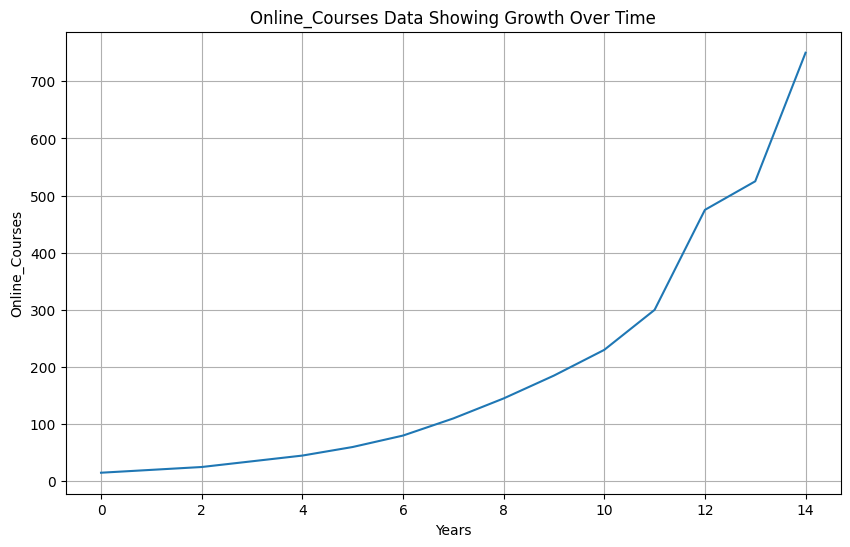

In [132]:
given_data = {
    "Year": np.arange(0, 15),
    "Online_Courses": [15, 20, 25, 35, 45, 60, 80, 110, 145, 185, 230, 300, 475, 525, 750]
}
# Create a dataframe from the given data
df = pd.DataFrame(given_data)

# Plot the raw data to visualize growth trends
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Online_Courses'])
plt.title('Online_Courses Data Showing Growth Over Time')
plt.xlabel('Years')
plt.ylabel('Online_Courses')
plt.grid(True)
plt.show()

### 2.2. Transform the Data Using Logarithm
**Task:** Apply a logarithmic transformation to the sales data

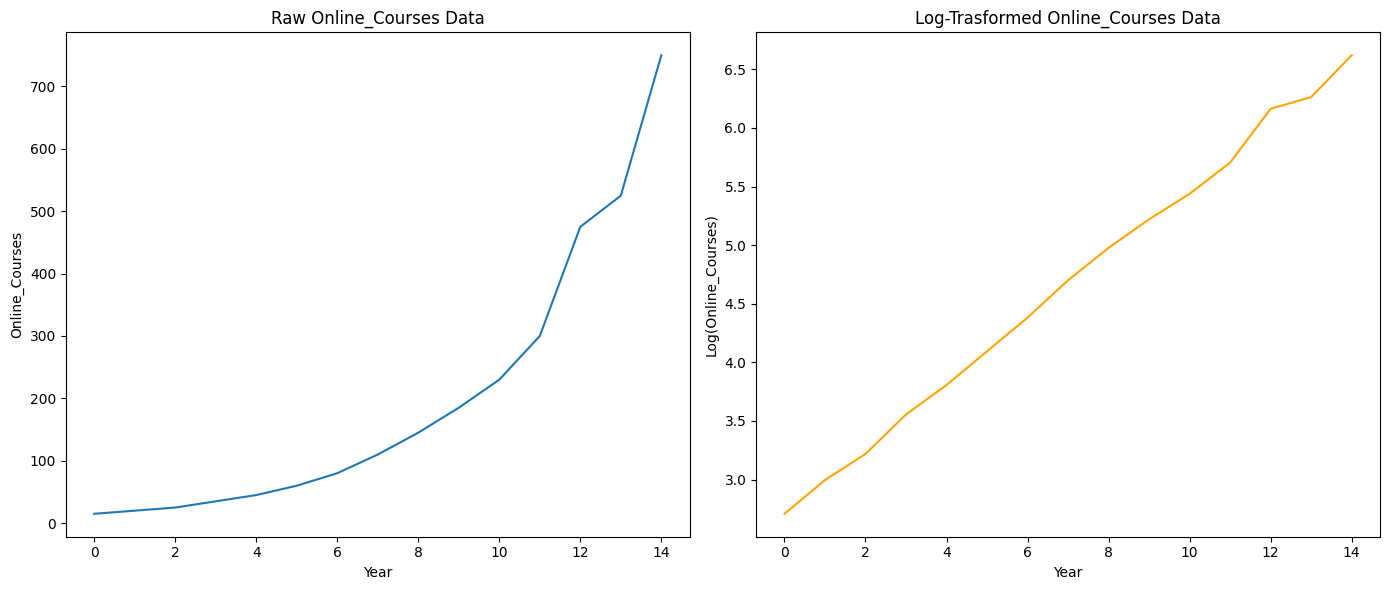

In [133]:
# Transform the Sales column using the natural logarithm (np.log)
df['Log_Online_Courses'] = np.log(df['Online_Courses'])
# Create a figure with two subplots side by side
# Plot the raw sales data on the first subplot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Year'], df['Online_Courses'])
plt.title('Raw Online_Courses Data')
plt.xlabel('Year')
plt.ylabel('Online_Courses')

# Plot the log-transformed sales data on the second subplot
plt.subplot(1, 2, 2)
plt.plot(df['Year'], df['Log_Online_Courses'], color='orange')
plt.title('Log-Trasformed Online_Courses Data')
plt.xlabel('Year')
plt.ylabel('Log(Online_Courses)')


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### 2.3. Fit a Linear Regression Model to the Transformed Data
**Task:** Fit a linear regression model to the logarithmically transformed sales data

In [134]:
# Use the time variable as the predictor and the log-transformed sales as the target
X_log = df['Year']
y_log = df['Log_Online_Courses']
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y_log, X_log).fit()
# Fit the model and plot the predicted values alongside the log-transformed sales
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:     Log_Online_Courses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9124.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           6.80e-20
Time:                        03:20:27   Log-Likelihood:                 25.081
No. Observations:                  15   AIC:                            -46.16
Df Residuals:                      13   BIC:                            -44.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7053      0.024    112.701      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


### 2.4. Fit a Linear Regression Model to the Raw Data
**Task:** Fit a linear regression model to the raw sales data

In [135]:
# Use the same time variable and fit a model to the raw sales data
X_lin = df['Year']
y_lin = df['Online_Courses']
X_lin = sm.add_constant(X_lin)
model_lin = sm.OLS(y_lin, X_lin).fit()
print(model_lin.summary())
# Plot the predicted values alongside the actual raw sales data


                            OLS Regression Results                            
Dep. Variable:         Online_Courses   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     49.44
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           8.91e-06
Time:                        03:20:27   Log-Likelihood:                -90.021
No. Observations:                  15   AIC:                             184.0
Df Residuals:                      13   BIC:                             185.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -108.8750     51.619     -2.109      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


### 2.5. Visualize and Evaluate the Model
**Task:** Evaluate the performance of both models (on transformed and raw data)

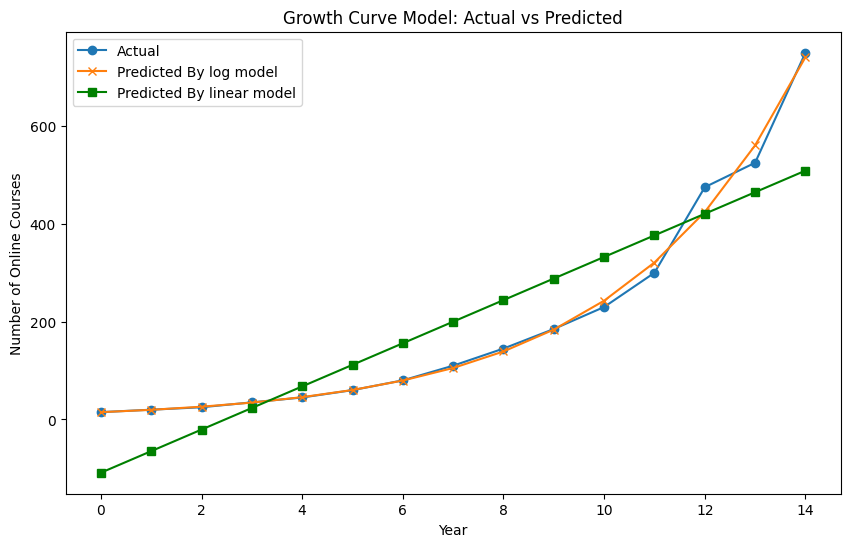

In [136]:
# Predict values using the raw model
df['Predicted_Log_Online_Courses'] = model_log.predict(X_log)
df['Predicted_Online_Courses'] = np.exp(df['Predicted_Log_Online_Courses'])
df['Predicted_Online_Courses_By_Linear'] = model_lin.predict(X_lin)

# Predict values using the log model and convert log predictions back to the original scale


# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Online_Courses'], label='Actual', marker='o')
plt.plot(df['Year'], df['Predicted_Online_Courses'], label='Predicted By log model', marker='x')
plt.plot(df['Year'], df['Predicted_Online_Courses_By_Linear'], label='Predicted By linear model', marker='s', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Online Courses')
plt.title('Growth Curve Model: Actual vs Predicted')
plt.legend()
plt.show()

In [137]:
# Calculate the error metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE) for both models
df['Error_Log_Model'] = df['Online_Courses'] - df['Predicted_Online_Courses']
df['Error_Linear_Model'] = df['Online_Courses'] - df['Predicted_Online_Courses_By_Linear']

mse_log_model = np.mean(df['Error_Log_Model'] ** 2)
mse_linear_model = np.mean(df['Error_Linear_Model'] ** 2)

mae_log_model = np.mean(np.abs(df['Error_Log_Model']))
mae_linear_model = np.mean(np.abs(df['Error_Linear_Model']))

# Compare which model performs better based on the error values

print("MAE log:"+str(mae_log_model))
print("MSE log:"+str(mse_log_model))
print("-----------------------------------")
print(f"MAE Raw: {mae_linear_model:.2f}")
print(f"MSE Raw: {mse_linear_model:.2f}")

MAE log:9.63002347860488
MSE log:306.6399101343047
-----------------------------------
MAE Raw: 82.87
MSE Raw: 9555.71
